## Diamine library - Visualizing compounds from the chemical space

**Author:** Quentin Duez

This notebook generates drawings of all molecules from the chemical space

**Outputs:** svg files

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [2]:
# Read global data
global_data = pd.read_excel("global_data.xlsx", index_col="inchi")
global_data = global_data.drop(
    columns=["can", "Unnamed: 0", "inchi_key", "index", "stoichiometry"]
)

# Make a Boltzmann weighing of the global data
col_names = list(global_data.columns)
col_toreweight = col_names[2:]
other_cols = col_names[:2]
weighted_data = global_data[other_cols]

for col in col_toreweight:
    weighted_data[col] = global_data[col] * global_data["weight"]

weighted_data = weighted_data.groupby(weighted_data.index, sort=False).sum()
# print(weighted_data)

C:\Users\qduez\AppData\Local\Temp\ipykernel_18268\3701212657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_data[col] = global_data[col] * global_data["weight"]
C:\Users\qduez\AppData\Local\Temp\ipykernel_18268\3701212657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_data[col] = global_data[col] * global_data["weight"]
C:\Users\qduez\AppData\Local\Temp\ipykernel_18268\3701212657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [3]:
# produce rdkit molecules
inchidf = pd.DataFrame()
inchidf["inchi"] = weighted_data.index
mols = pd.Series(inchidf.inchi.map(Chem.MolFromInchi), index=inchidf.index).to_frame(
    "mol"
)

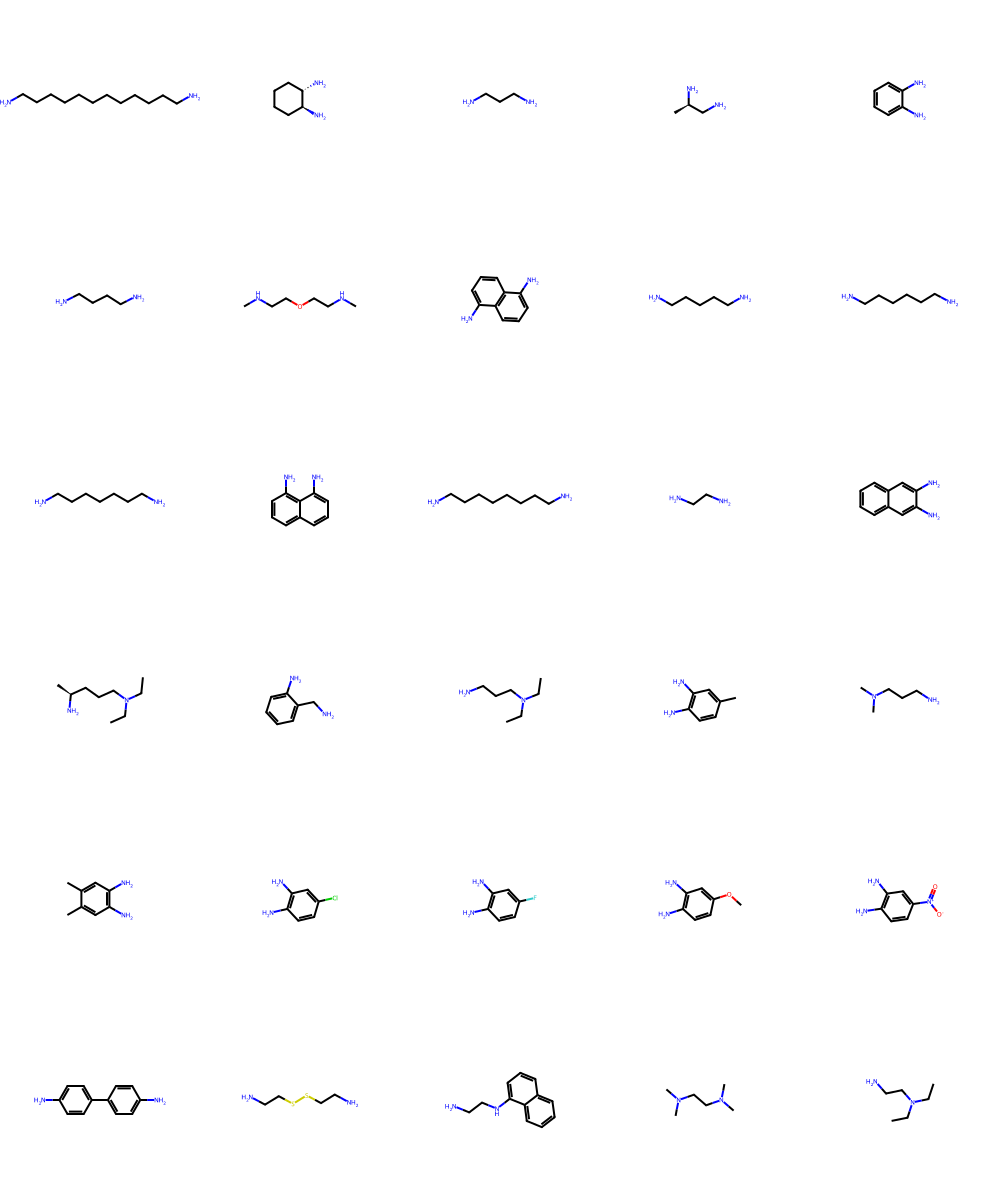

In [4]:
# Create drawing options with reduced padding
dopts = rdMolDraw2D.MolDrawOptions()
dopts.padding = -0.0  # Remove extra padding around each molecule
dopts.fixedBondLength = 25  # Optional: set a fixed bond length to standardize sizing

ms = mols["mol"]
svg = Draw.MolsToGridImage(
    ms[:30],
    molsPerRow=5,
    subImgSize=(200, 200),
    drawOptions=dopts,
    useSVG=True,
    maxMols=len(ms),
)

display(svg)

OUTFILE = "FigureS1_AllStructures_0"
#with open(f"{OUTFILE}.svg", "w") as f:
    #f.write(svg.data)

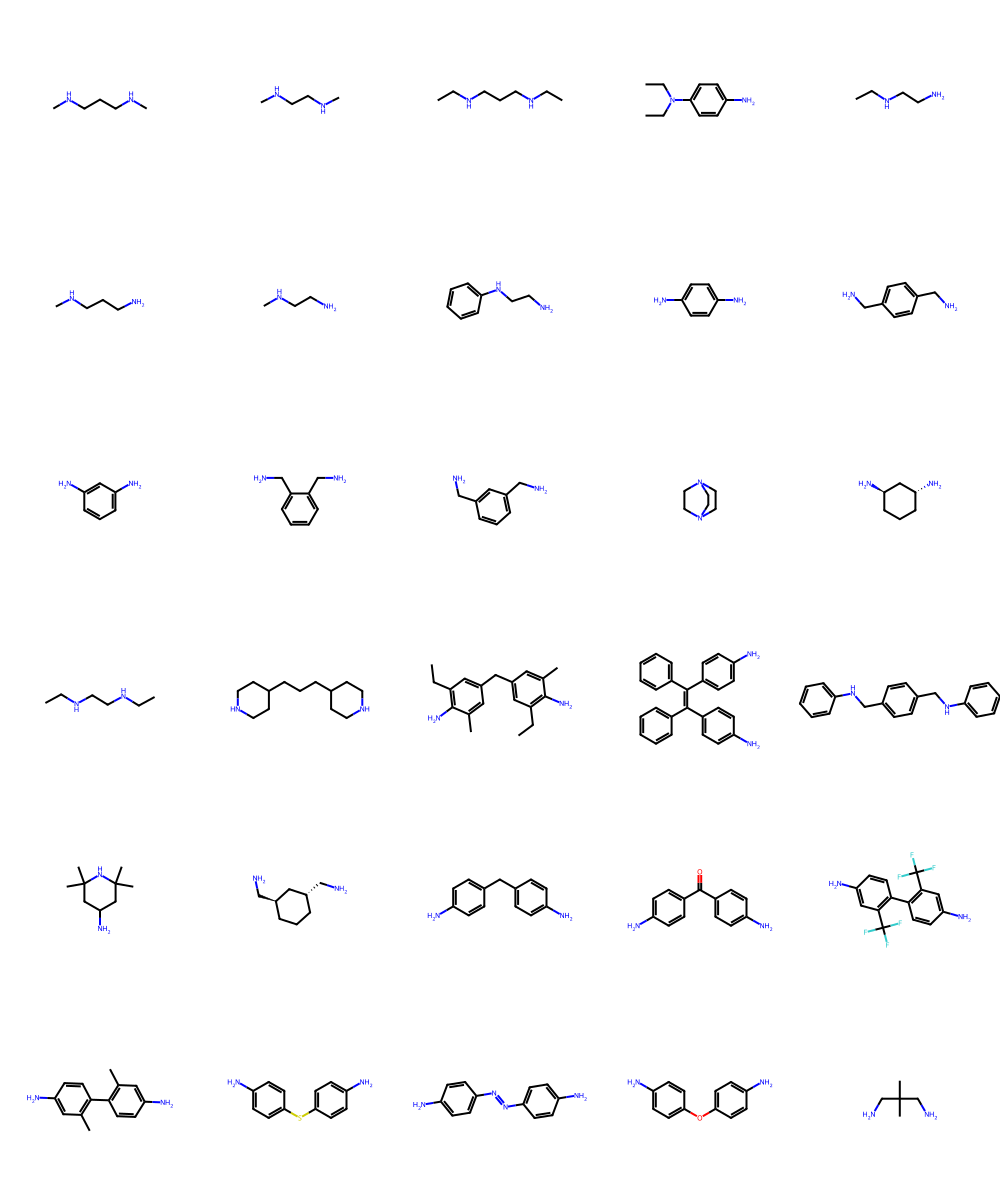

In [5]:
# Create drawing options with reduced padding
dopts = rdMolDraw2D.MolDrawOptions()
dopts.padding = -0.0  # Remove extra padding around each molecule
dopts.fixedBondLength = 25  # Optional: set a fixed bond length to standardize sizing

ms = mols["mol"]
svg = Draw.MolsToGridImage(
    ms[30:60],
    molsPerRow=5,
    subImgSize=(200, 200),
    drawOptions=dopts,
    useSVG=True,
    maxMols=len(ms),
)

display(svg)

OUTFILE = "FigureS1_AllStructures_1"
#with open(f"{OUTFILE}.svg", "w") as f:
    #f.write(svg.data)

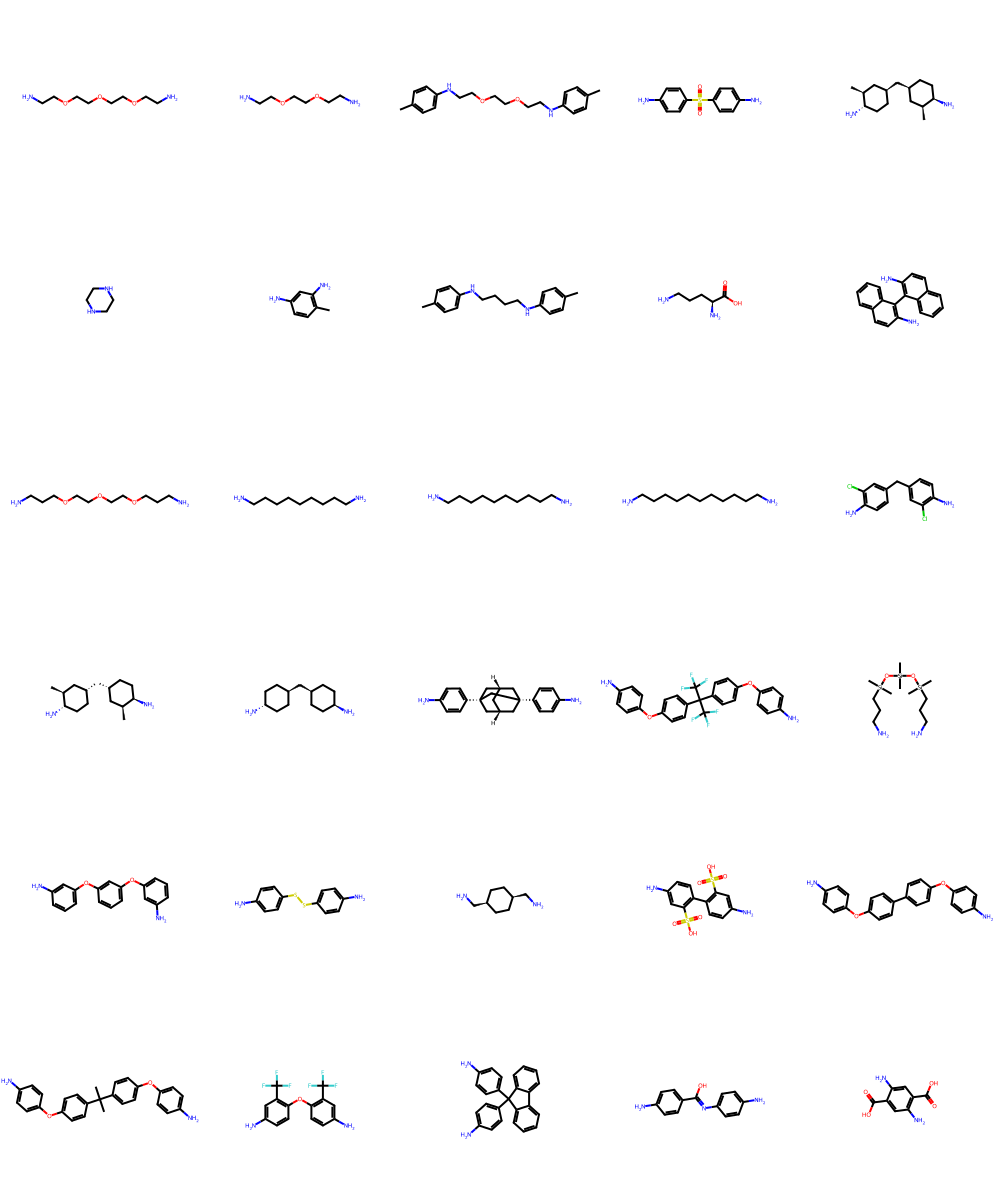

In [6]:
# Create drawing options with reduced padding
dopts = rdMolDraw2D.MolDrawOptions()
dopts.padding = -0.0  # Remove extra padding around each molecule
dopts.fixedBondLength = 25  # Optional: set a fixed bond length to standardize sizing

ms = mols["mol"]
svg = Draw.MolsToGridImage(
    ms[60:90],
    molsPerRow=5,
    subImgSize=(200, 200),
    drawOptions=dopts,
    useSVG=True,
    maxMols=len(ms),
)

display(svg)

OUTFILE = "FigureS1_AllStructures_2"
#with open(f"{OUTFILE}.svg", "w") as f:
    #f.write(svg.data)

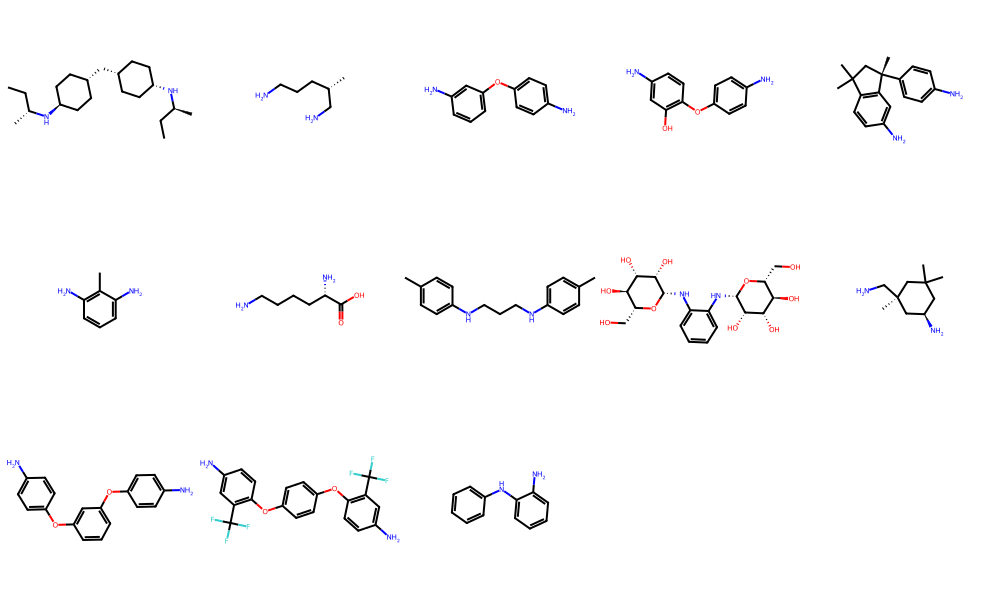

In [7]:
# Create drawing options with reduced padding
dopts = rdMolDraw2D.MolDrawOptions()
dopts.padding = -0.0  # Remove extra padding around each molecule
dopts.fixedBondLength = 25  # Optional: set a fixed bond length to standardize sizing

ms = mols["mol"]
svg = Draw.MolsToGridImage(
    ms[90:],
    molsPerRow=5,
    subImgSize=(200, 200),
    drawOptions=dopts,
    useSVG=True,
    maxMols=len(ms),
)

display(svg)

OUTFILE = "FigureS1_AllStructures_3"
#with open(f"{OUTFILE}.svg", "w") as f:
    #f.write(svg.data)

In [8]:
# SMILES of diamines in the selected library
available_df = pd.read_csv("Experimental_CCS.csv", sep=';', index_col=None, encoding='latin-1', header=0)
available_list = available_df['SMILES']

mols = pd.Series(
    available_df['SMILES'].map(Chem.MolFromSmiles), index=available_list.index
).to_frame("mol")

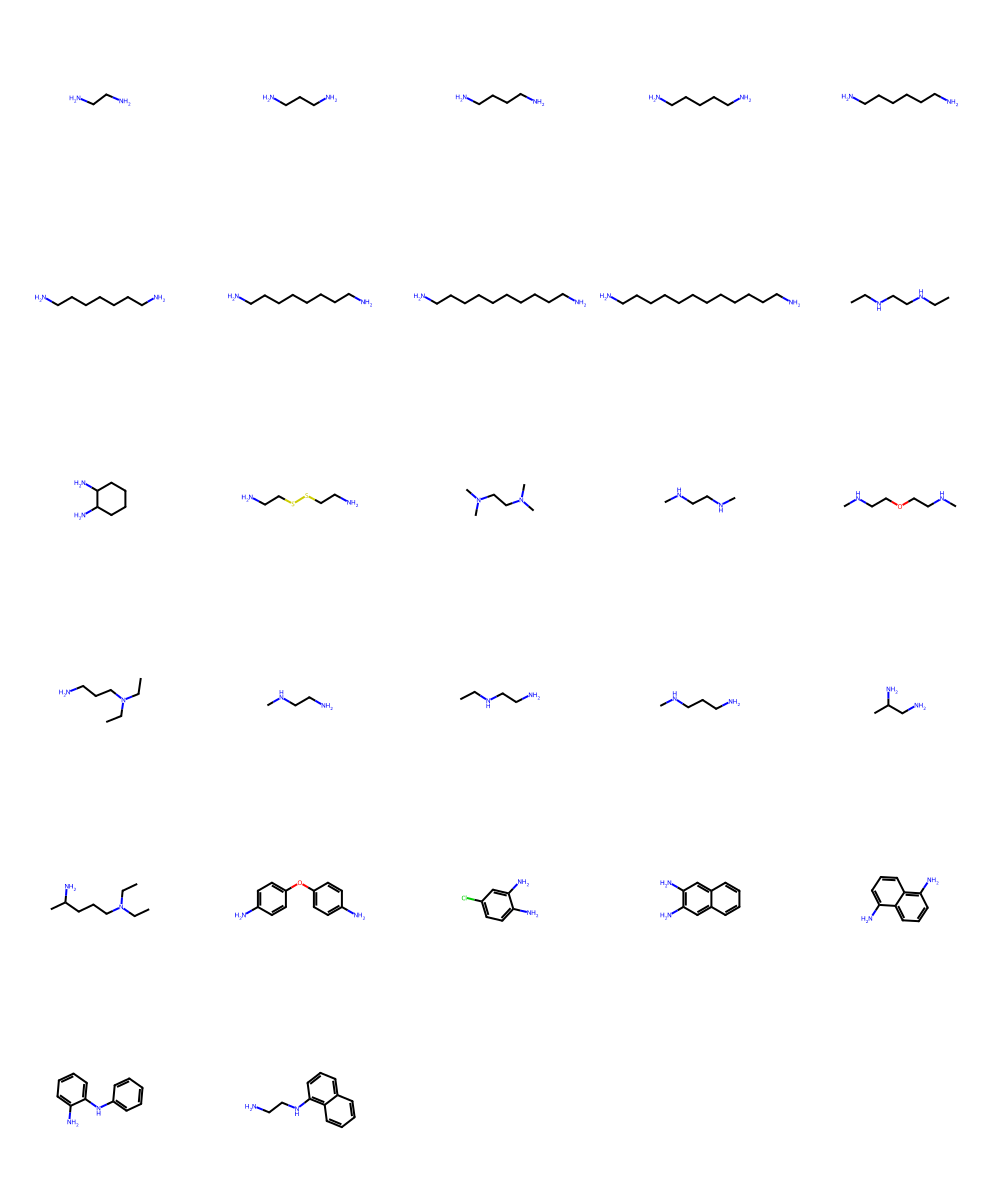

In [9]:
# Create drawing options with reduced padding
dopts = rdMolDraw2D.MolDrawOptions()
dopts.padding = -0.0  # Remove extra padding around each molecule
dopts.fixedBondLength = 25  # Optional: set a fixed bond length to standardize sizing

ms = mols["mol"]
svg = Draw.MolsToGridImage(
    ms,
    molsPerRow=5,
    subImgSize=(200, 200),
    drawOptions=dopts,
    useSVG=True,
    maxMols=len(ms),
)

display(svg)

OUTFILE = "FigureSI_SelectedStructures"
# with open(f"{OUTFILE}.svg", "w") as f:
# f.write(svg.data)